In [7]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets

# hide warnings
import warnings
warnings.simplefilter("ignore")

# checking if chart_studio_plotly is installed; install otherwise
try:
    import chart_studio.plotly as py
except:
    ! pip install chart_studio
    import chart_studio.plotly as py

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# checking if seaborn is installed; install otherwise
try:
    import seaborn as sns
except:
    ! pip install --user seaborn
    import seaborn as sns

In [44]:
# read the csv file into a DataFrame
df = pd.read_csv("C:/Users/21696/Desktop/Data/GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [27]:

# convert first column to DateTime format
df['dt'] = pd.to_datetime(df['dt'])

# set first column (dt) as the index column
df.index = df['dt']
del df['dt']

# dropping AverageTemperatureUncertainty, Latitude and Longitude and combining City and Country into City
df = df.drop({"AverageTemperatureUncertainty", "Latitude", "Longitude"}, 1)
df["City"] = df["City"] + ", " + df["Country"]
df = df.drop("Country", 1)

# removing all rows with NaN values
df = df.dropna()

# get list of all cities in dataset
cities = set(df.City)

In [43]:
df.head()

,AverageTemperature,City
dt,,
1743-11-01,6.068,"Århus, Denmark"
1744-04-01,5.788,"Århus, Denmark"
1744-05-01,10.644,"Århus, Denmark"
1744-06-01,14.051,"Århus, Denmark"
1744-07-01,16.082,"Århus, Denmark"


In [42]:
set(df.City)

{'Ibirité, Brazil',
 'Bucaramanga, Colombia',
 'Qujing, China',
 'Franca, Brazil',
 'Rio Cuarto, Argentina',
 'Jakarta, Indonesia',
 'Giugliano In Campania, Italy',
 'Grand Rapids, United States',
 'Laiwu, China',
 'Zhaoqing, China',
 'Corrientes, Argentina',
 'Krishnanagar, India',
 'Amsterdam, Netherlands',
 'Aden, Yemen',
 'Ashqelon, Israel',
 'Kinshasa, Congo (Democratic Republic Of The)',
 'Liverpool, United Kingdom',
 'Thanjavur, India',
 'Kursk, Russia',
 'Mitaka, Japan',
 'Kalmunai, Sri Lanka',
 'Seattle, United States',
 'Eindhoven, Netherlands',
 'Iwatsuki, Japan',
 'Varna, Bulgaria',
 'Shahe, China',
 'Toronto, Canada',
 'Osnabrück, Germany',
 'Velikiy Novgorod, Russia',
 'Hachinohe, Japan',
 'Nagareyama, Japan',
 'Maroua, Cameroon',
 'Malabo, Equatorial Guinea',
 'Nandurbar, India',
 'Pleven, Bulgaria',
 'Milan, Italy',
 'Chhapra, India',
 'Cordoba, Argentina',
 'Malegaon, India',
 'Tempe, United States',
 'Itajaí, Brazil',
 'Zhaotong, China',
 'London, United Kingdom',
 'G

In [38]:
print(df['City'])

dt
1743-11-01         Århus, Denmark
1744-04-01         Århus, Denmark
1744-05-01         Århus, Denmark
1744-06-01         Århus, Denmark
1744-07-01         Århus, Denmark
1744-09-01         Århus, Denmark
1744-10-01         Århus, Denmark
1744-11-01         Århus, Denmark
1744-12-01         Århus, Denmark
1745-01-01         Århus, Denmark
1745-02-01         Århus, Denmark
1745-03-01         Århus, Denmark
1745-04-01         Århus, Denmark
1750-01-01         Århus, Denmark
1750-02-01         Århus, Denmark
1750-03-01         Århus, Denmark
1750-04-01         Århus, Denmark
1750-05-01         Århus, Denmark
1750-06-01         Århus, Denmark
1750-07-01         Århus, Denmark
1750-08-01         Århus, Denmark
1750-09-01         Århus, Denmark
1750-10-01         Århus, Denmark
1750-12-01         Århus, Denmark
1751-01-01         Århus, Denmark
1751-02-01         Århus, Denmark
1751-03-01         Århus, Denmark
1751-04-01         Århus, Denmark
1751-06-01         Århus, Denmark
1751-07-01 

In [39]:
df.City

dt
1743-11-01         Århus, Denmark
1744-04-01         Århus, Denmark
1744-05-01         Århus, Denmark
1744-06-01         Århus, Denmark
1744-07-01         Århus, Denmark
1744-09-01         Århus, Denmark
1744-10-01         Århus, Denmark
1744-11-01         Århus, Denmark
1744-12-01         Århus, Denmark
1745-01-01         Århus, Denmark
1745-02-01         Århus, Denmark
1745-03-01         Århus, Denmark
1745-04-01         Århus, Denmark
1750-01-01         Århus, Denmark
1750-02-01         Århus, Denmark
1750-03-01         Århus, Denmark
1750-04-01         Århus, Denmark
1750-05-01         Århus, Denmark
1750-06-01         Århus, Denmark
1750-07-01         Århus, Denmark
1750-08-01         Århus, Denmark
1750-09-01         Århus, Denmark
1750-10-01         Århus, Denmark
1750-12-01         Århus, Denmark
1751-01-01         Århus, Denmark
1751-02-01         Århus, Denmark
1751-03-01         Århus, Denmark
1751-04-01         Århus, Denmark
1751-06-01         Århus, Denmark
1751-07-01 

In [41]:
city_df

,AverageTemperature
dt,
1743-11-01,3.264
1744-04-01,9.788
1744-05-01,15.708
1744-06-01,21.210
1744-07-01,22.207
1744-09-01,14.922
1744-10-01,8.968
1744-11-01,3.161
1744-12-01,-2.681


In [28]:
# check stationarity in time series data of a given city

def check_stationarity(city_df):
    # method1: plot the time series to check for trend and seasonality
    city_df.plot(figsize=(15, 15))

In [29]:
# check stationarity for data of a specific city entered by the user

city_drop_down_menu = widgets.Dropdown(
    options=sorted(list(cities)),
    value='New York, United States',
    description='City:',
    disabled=False,
)

city_drop_down_menu

Dropdown(description='City:', index=2117, options=('A Coruña, Spain', 'Aachen, Germany', 'Aalborg, Denmark', '…

In [30]:
chosen_city = city_drop_down_menu.value
city_df = df[df.City == chosen_city].drop("City", 1)

Stationarity Check for New York, United States


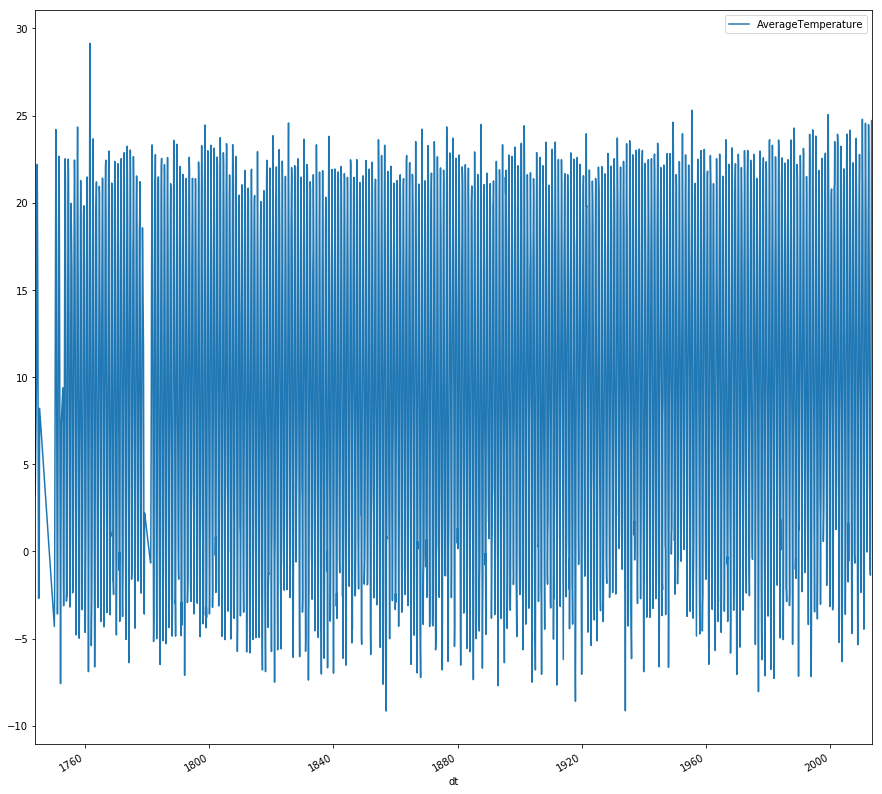

In [31]:
print ("Stationarity Check for %s" % chosen_city)
is_stationary = check_stationarity(city_df)

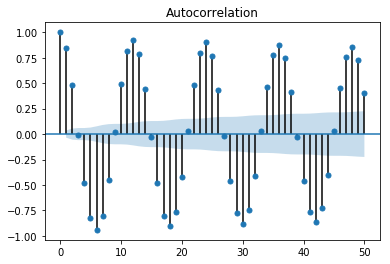

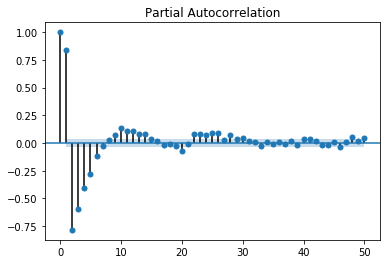

In [17]:
# ACF and PACF plots
#ACF is an auto-correlation function which gives us values of auto-correlation of any series with its lagged values.
#it actually describes how well the present value of the series is related with its past values.
#PACF is a partial auto-correlation function

plot_acf(city_df,lags = 50)
plot_pacf(city_df,lags = 50)
plt.show()

# setting d value for ARIMA model
if (is_stationary==True):
    d = 0
else:
    d = 1

In [18]:
# Although we can determine p, q values manually by looking at the ACF and PACF plots for a given city, we must automate the process
# To automate the process, we must perform a grid search over different values of p and q and choose the ARIMA model for which the AIC and BIC values are minimum

p_range = q_range = list(range(0,3))  # taking values from 0 to 2

aic_values = []
bic_values = []
pq_values = []

for p in p_range:
    for q in q_range:
        try:
            model = ARIMA(city_df, order=(p, d, q))
            results = model.fit(disp=-1)
            aic_values.append(ARMAResults.aic(results))
            bic_values.append(ARMAResults.bic(results))
            pq_values.append((p, q))
        except:
            pass

best_pq = pq_values[aic_values.index(min(aic_values))]  # (p,q) corresponding to lowest AIC score
print("(p,q) corresponding to lowest AIC score: ", best_pq)

(p,q) corresponding to lowest AIC score:  (2, 2)


In [19]:
# fitting an ARIMA model with chosen p, d, q values and calculating the mean squared error
from sklearn.metrics import mean_absolute_error

arima_model = ARIMA(city_df, order=(best_pq[0], 0, best_pq[1])).fit()
predictions = arima_model.predict(start=0, end=len(city_df)-1)

mse = mean_squared_error(list(city_df.AverageTemperature), list(predictions))
print("Mean Squared Error:", mse)

mae = mean_absolute_error(list(city_df.AverageTemperature), list(predictions))
print("Mean Absolute Error:", mae)

Mean Squared Error: 4.678029814914216
Mean Absolute Error: 1.5779947272783397


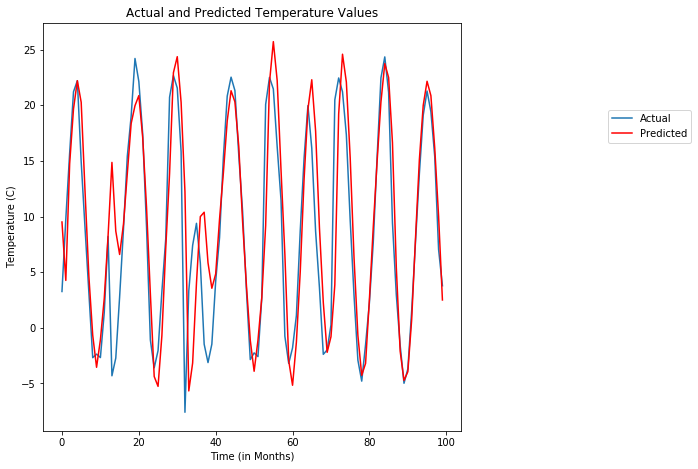

In [20]:
# comparing first 100 predictions with actual values

plt.figure(figsize=(7.5,7.5))
plt.plot(list(city_df.AverageTemperature)[:100], label="Actual")
plt.plot(list(predictions)[:100], 'r', label="Predicted")

plt.xlabel("Time (in Months)")
plt.ylabel("Temperature (C)")
plt.title("Actual and Predicted Temperature Values")

plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
plt.show()

In [21]:
# drop-down menu to select number of years for which predictions are required

years_drop_down_menu = widgets.Dropdown(
    options=list(range(1,201)),
    value=10,
    description='No. of Years:',
    disabled=False,
)

years_drop_down_menu

Dropdown(description='No. of Years:', index=9, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…

In [22]:
num_years = years_drop_down_menu.value
last_month_in_dataset = city_df.index[-1].month  # gets last month in city_df
remaining_months = 12 - last_month_in_dataset  # months left in current year for that city's data
number_of_steps = remaining_months + num_years * 12  # number of steps to make out-of-sample predictions

out_of_sample_forecast = arima_model.forecast(steps=number_of_steps)[0]  # predictions

out_of_sample_forecast = out_of_sample_forecast[remaining_months:]  # excluding predictions for remaining months in current year

In [23]:
# displaying forecasted values for the nth year

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
i = 0
for x in out_of_sample_forecast[-12:]:  # last year
    print(months[i]+": ", x, 'C')
    i += 1

January:  2.145159204140669 C
February:  4.258443025617996 C
March:  7.766404638572061 C
April:  11.708850770499897 C
May:  15.018183773105907 C
June:  16.808398260584042 C
July:  16.61216775627662 C
August:  14.502612947752464 C
September:  11.068086496958337 C
October:  7.248269138724659 C
November:  4.07718831294623 C
December:  2.4034073673262095 C


In [24]:
# plotting the predicted values for the nth year

trace = go.Scatter(
    x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    y = out_of_sample_forecast[-12:],
    mode = 'lines',
    name = 'Average Temperature'
)

layout = go.Layout(
    title='Predicted Temperatures for the Year %d' % (2013+num_years),
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Temperature (C)',
    )
)
data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

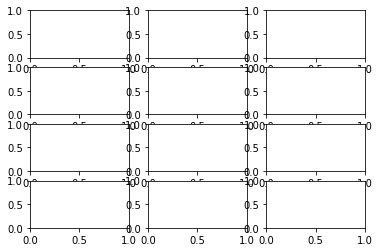

In [25]:
# plotting monthly temperature changes from 2013 to 2013+n years

fig, ax = plt.subplots(nrows=4, ncols=3)

monthly_change = {}

for month in range(12):
    temp = month
    for year in range(num_years):
        if month not in monthly_change:
            monthly_change[month] = [out_of_sample_forecast[temp]]
        else:
            monthly_change[month].append(out_of_sample_forecast[temp])
        temp+=12

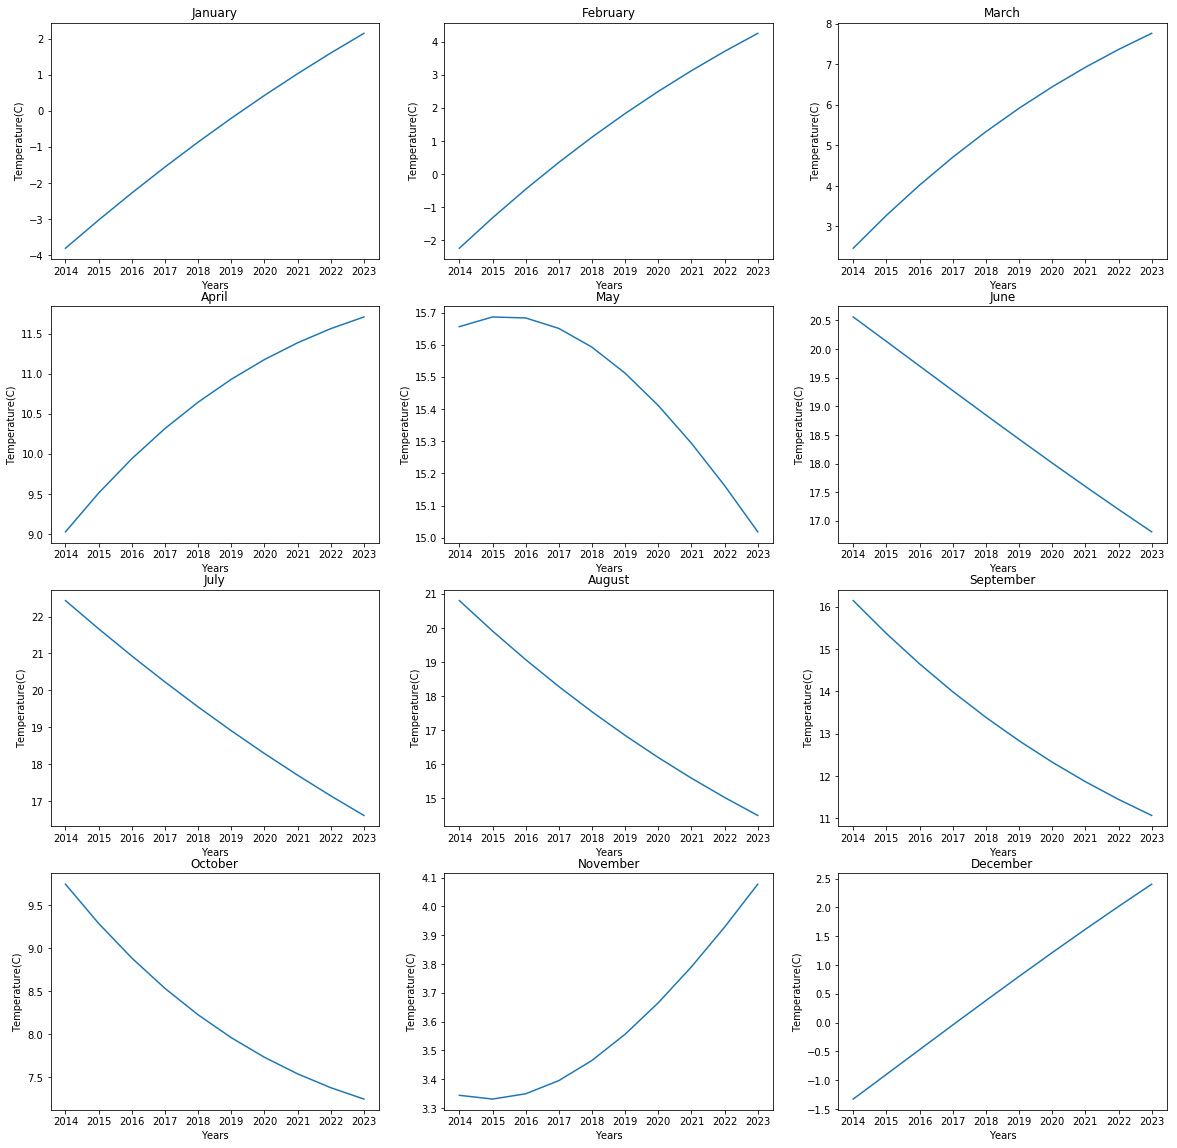

In [26]:
plt.figure(figsize=(20,20))
for pos in range(0,12):
    plt.subplot(4,3,pos+1)
    plt.plot(monthly_change[pos])
    plt.xticks(np.array(range(num_years)), [i for i in range(2014,2014+num_years)])
    plt.title(months[pos])
    plt.xlabel('Years')
    plt.ylabel('Temperature(C)')

plt.show()